In [5]:
import yfinance as yf

# Specify the ticker symbol for Microsoft (MSFT)
ticker_symbol = "MSFT"

# Fetch entire historical data for Microsoft without specifying start or end date
df = yf.download(ticker_symbol)

# Print the fetched data
print(df)


[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1986-03-13    0.088542    0.101563    0.088542    0.097222    0.060396   
1986-03-14    0.097222    0.102431    0.097222    0.100694    0.062553   
1986-03-17    0.100694    0.103299    0.100694    0.102431    0.063632   
1986-03-18    0.102431    0.103299    0.098958    0.099826    0.062014   
1986-03-19    0.099826    0.100694    0.097222    0.098090    0.060936   
...                ...         ...         ...         ...         ...   
2023-11-02  347.239990  348.829987  344.769989  348.320007  348.320007   
2023-11-03  349.630005  354.390015  347.329987  352.799988  352.799988   
2023-11-06  353.450012  357.540009  353.350006  356.529999  356.529999   
2023-11-07  359.399994  362.459991  357.630005  360.529999  360.529999   
2023-11-08  361.679993  363.869995  360.549

In [6]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060396,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062553,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063632,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062014,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060936,47894400
...,...,...,...,...,...,...
2023-11-02,347.239990,348.829987,344.769989,348.320007,348.320007,24348100
2023-11-03,349.630005,354.390015,347.329987,352.799988,352.799988,23624000
2023-11-06,353.450012,357.540009,353.350006,356.529999,356.529999,23828300


In [7]:
df = df[['Close']]


In [8]:
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-11-02,348.320007
2023-11-03,352.799988
2023-11-06,356.529999


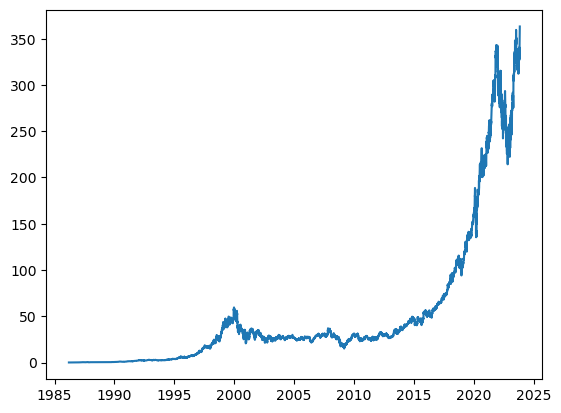

In [9]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [24]:
import pandas as pd
import numpy as np
import datetime

# Assuming you have a working str_to_datetime function
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = str_to_datetime(first_date_str)
    last_date  = str_to_datetime(last_date_str)

    target_date = first_date
    
    dates = []
    X, Y = [], []

    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)
        
        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        values = df_subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        next_date = target_date + datetime.timedelta(days=7)
        
        if next_date > last_date:
            break
        
        target_date = next_date

    ret_df = pd.DataFrame({
        'Target Date': dates,
        'Target': Y
    })

    # Create column names for features (X)
    for i in range(n):
        ret_df[f'Target-{n-i}'] = [x[i] for x in X]

    return ret_df

# Sample DataFrame
# df = pd.DataFrame(...)  # Your actual DataFrame goes here

# Example usage
windowed_df = df_to_windowed_df(df, '2020-01-01', '2023-11-10', n=3)
windowed_df

,Target Date,Target,Target-3,Target-2,Target-1
0,2020-01-01,157.699997,158.669998,158.960007,157.589996
1,2020-01-08,160.089996,158.619995,159.029999,157.580002
2,2020-01-15,163.179993,161.339996,163.279999,162.130005
3,2020-01-22,165.699997,166.169998,167.100006,166.500000
4,2020-01-29,168.039993,165.039993,162.279999,165.460007
...,...,...,...,...,...
197,2023-10-11,332.420013,327.260010,329.820007,328.390015
198,2023-10-18,330.109985,327.730011,332.640015,332.059998
199,2023-10-25,340.670013,326.670013,329.320007,330.529999
200,2023-11-01,346.070007,329.809998,337.309998,338.109985


In [25]:
import numpy as np

def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()
    dates = df_as_np[:, 0]
    middle_matrix = df_as_np[:, 1:-1]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
    Y = df_as_np[:, -1]
    return dates, X.astype(np.float32), Y.astype(np.float32)

# Assuming you have a 'windowed_df' DataFrame (output from the previous function)
dates, X, y = windowed_df_to_date_X_y(windowed_df)

# Print the shapes of dates, X, and y
print("Dates Shape:", dates.shape)
print("X Shape:", X.shape)
print("y Shape:", y.shape)


Dates Shape: (202,)
X Shape: (202, 3, 1)
y Shape: (202,)


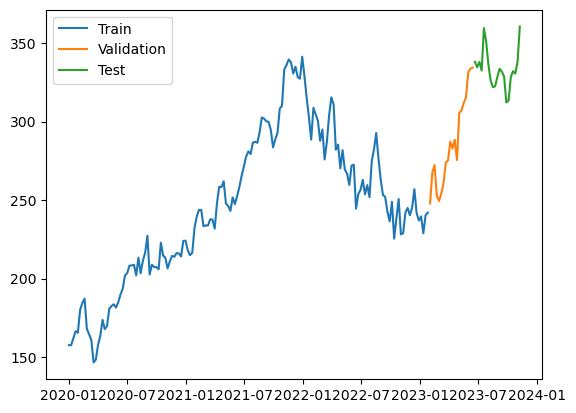

In [26]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
6/6 [==============================] - 3s 134ms/step - loss: 62124.0117 - mean_absolute_error: 244.7907 - val_loss: 82476.0234 - val_mean_absolute_error: 285.8369
Epoch 2/100
6/6 [==============================] - 0s 10ms/step - loss: 61898.9883 - mean_absolute_error: 244.3341 - val_loss: 82224.3359 - val_mean_absolute_error: 285.3964
Epoch 3/100
6/6 [==============================] - 0s 20ms/step - loss: 61687.9375 - mean_absolute_error: 243.9036 - val_loss: 81960.6875 - val_mean_absolute_error: 284.9340
Epoch 4/100
6/6 [==============================] - 0s 10ms/step - loss: 61443.2734 - mean_absolute_error: 243.4035 - val_loss: 81651.4062 - val_mean_absolute_error: 284.3905
Epoch 5/100
6/6 [==============================] - 0s 10ms/step - loss: 61166.3359 - mean_absolute_error: 242.8287 - val_loss: 81289.1953 - val_mean_absolute_error: 283.7524
Epoch 6/100
6/6 [==============================] - 0s 11ms/step - loss: 60826.1289 - mean_absolute_error: 242.1245 - val_loss: 80

6/6 [==============================] - 0s 2ms/step


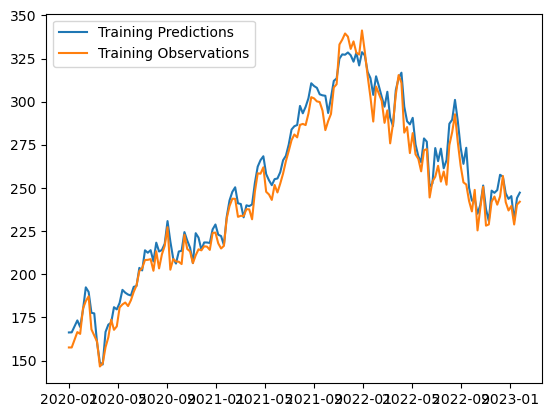

In [28]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 25ms/step


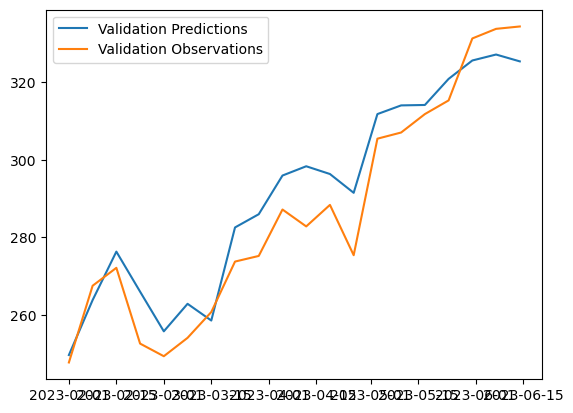

In [29]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 25ms/step


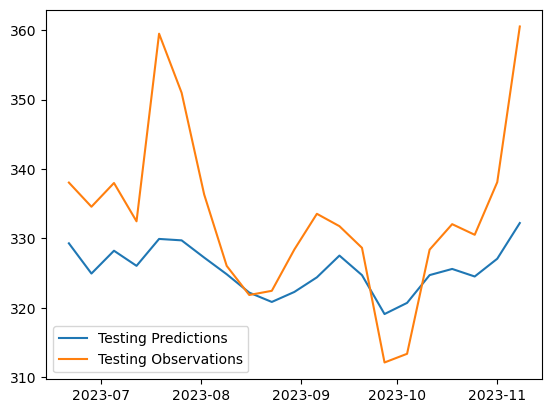

In [30]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

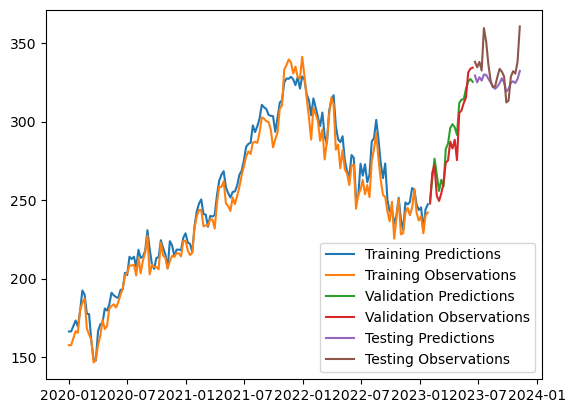

In [31]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [32]:
# Initialize a list to store recursive predictions
recursive_predictions = []

# Concatenate validation and test dates for recursive predictions
recursive_dates = np.concatenate([dates_val, dates_test])

# Get the last window from the training data
last_window = X_train[-1]

# Loop through each target date for recursive predictions
for target_date in recursive_dates:
    # Predict the next value using the model
    next_prediction = model.predict(np.array([last_window])).flatten()
    
    # Store the prediction
    recursive_predictions.append(next_prediction)
    
    # Update the last window for the next iteration
    last_window = np.roll(last_window, shift=-1, axis=1)  # Shift the elements to the left
    last_window[0, -1] = next_prediction  # Update the last element of the window

# Convert the list of predictions to a NumPy array
recursive_predictions = np.array(recursive_predictions)


1/1 [==============================] - 0s 29ms/step


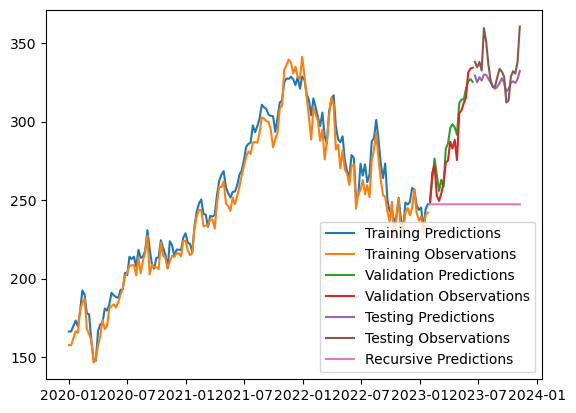

In [33]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])